<a href="https://www.kaggle.com/choureymanas/red-wine-quality-prediction?scriptVersionId=85684745" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# DATA PROPERTIES

In [2]:
#reading the file
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
#Lets take a glimpse of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Checking null values in each column
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Checking length of dataset
print(df.shape)

(1599, 12)


In [8]:
#Target variable
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# DATA VISUALIZATION

In [9]:
import plotly.express as px
df_new = df['quality'].value_counts().rename_axis('Winequality').reset_index(name='counts')
df_new
fig = px.pie(df_new, values='counts', names='Winequality')
fig.show()

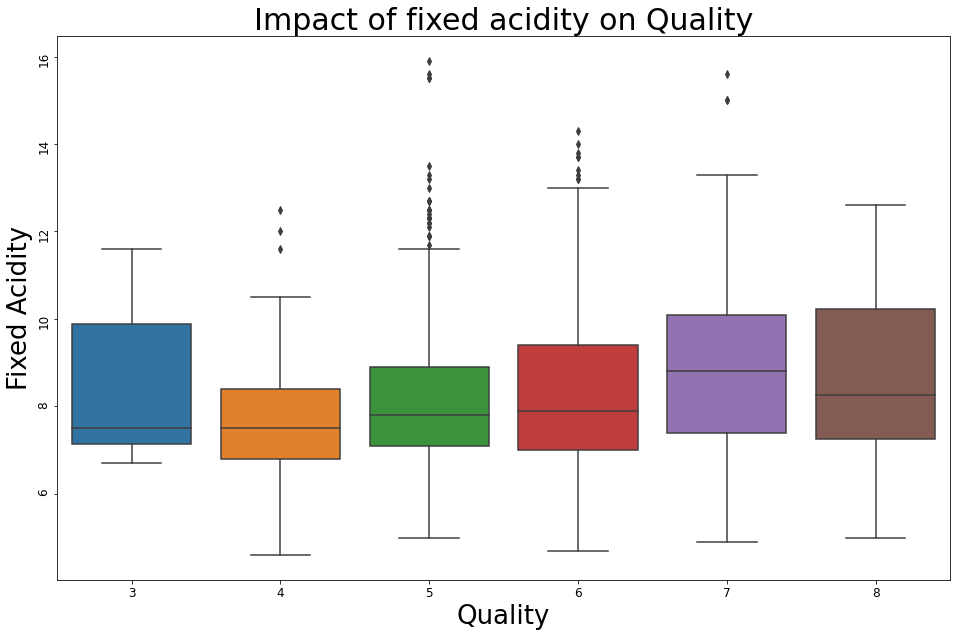

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='fixed acidity',x='quality',data=df)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of fixed acidity on Quality",fontsize=30)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('Fixed Acidity',fontsize=26)
plt.show()

As per above distribution, lets create a binary feature for wine quality having two values Good(1) and Bad(0)

In [11]:
df['Good'] =df['quality'].apply(lambda x : 1 if(x>5) else 0)
df.drop(['quality'],inplace=True,axis=1)

# DATA PREPARATION

In [12]:
#Data preparation
X = df.drop(['Good'],axis=1)
Y = df['Good']
del df

In [13]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 90)

# DATA MODELLING

In [14]:
#model building - Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
rf_gini = RandomForestClassifier(criterion = 'gini')
rf_entropy = RandomForestClassifier(criterion = 'entropy')

***Using Different Criteria - Gini and Entropy***

In [15]:
#using rf_gini
rf_gini.fit(X_train,Y_train)
y_pred = rf_gini.predict(X_test)
g_f1score = f1_score(Y_test,y_pred)
g_acc = accuracy_score(Y_test,y_pred)


#using rf_entropy
rf_gini.fit(X_train,Y_train)
y_pred = rf_gini.predict(X_test)
e_f1score = f1_score(Y_test,y_pred)
e_acc = accuracy_score(Y_test,y_pred)

Text(0.5, 0, 'f1_score')

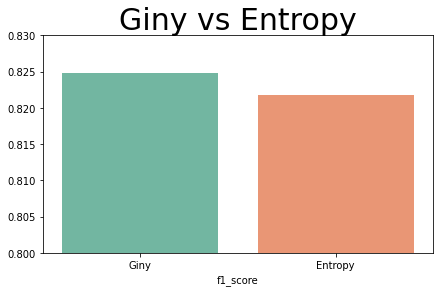

In [16]:
plt.figure(figsize=(7,4))
sns.barplot(x=['Giny','Entropy'],y=[g_f1score,e_f1score],palette = 'Set2')
plt.ylim(0.8, 0.83)
plt.title("Giny vs Entropy",fontsize=30)
plt.xlabel("f1_score")

Text(0.5, 0, 'Accuracy Score')

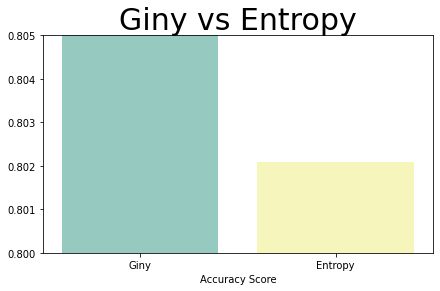

In [17]:
plt.figure(figsize=(7,4))
sns.barplot(x=['Giny','Entropy'],y=[g_acc,e_acc],palette = 'Set3')
plt.title("Giny vs Entropy",fontsize=30)
plt.ylim(0.8, 0.805)
plt.xlabel("Accuracy Score")